In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from print_array import *
import time
import scipy.optimize as opt

In [35]:
#reading in data and removing nan values

data = np.loadtxt('mim_no2.txt', skiprows = 1)

data_no_nans = []

for i in range(0, len(data), 1):
    if(np.isnan(data[i,0]) == False and np.isnan(data[i,2]) == False):
        data_no_nans.append(data[i])
data = np.array(data_no_nans)

t = data[:,0]/60
NO2 = data[:,1]
s = NO2.shape
NO2err = data[:,2]
NO2avg = data[:,3]
NO2avgstd = data[:,4]

#calculating a better fit of the average data

fit_func = lambda x, c1, c2: c1 + c2 * NO2avg

opt_par, opt_cov = opt.curve_fit(fit_func, t, NO2)

#more complex fit depending on time

fit_func2 = lambda x, p0, p1, p2: p0 + NO2avg * (p1 + p2 * x)

opt_par2, opt_cov2 = opt.curve_fit(fit_func2, t, NO2)

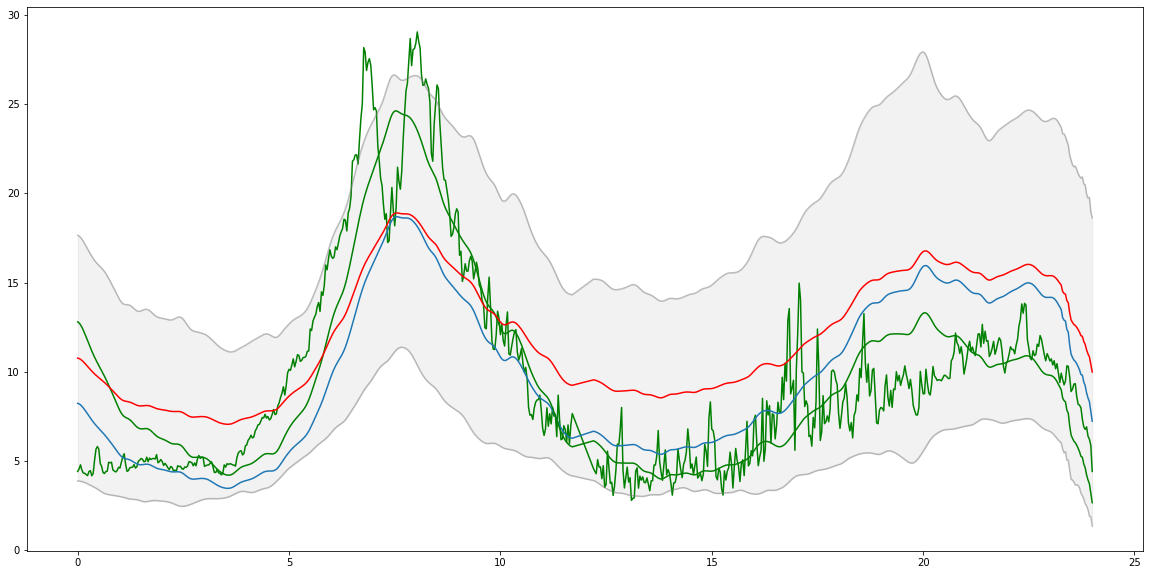

In [36]:
fig1 = plt.figure(figsize = (20,10))
plt.plot(t, NO2, color = 'g')
plt.plot(t, fit_func(t, opt_par[0], opt_par[1]))    #fitted avg data
plt.plot(t, fit_func2(t, opt_par2[0], opt_par2[1], opt_par2[2]), color = 'g')  #more complexly fitted data
plt.plot(t, NO2avg, color = 'r')
plt.plot(t, NO2avg + NO2avgstd, color = 'grey', alpha = 0.5)
plt.plot(t, NO2avg - NO2avgstd, color = 'grey', alpha = 0.5)
plt.fill_between(t, NO2avg + NO2avgstd, NO2avg - NO2avgstd, alpha= 0.1, color = 'grey')

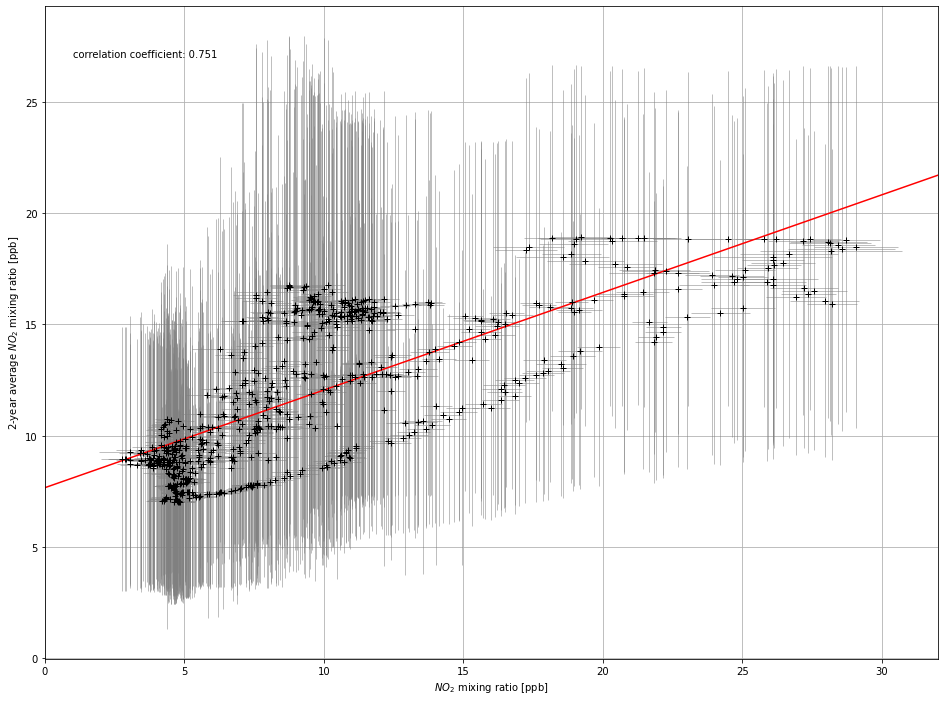

In [40]:
fig2 = plt.figure(figsize = (16, 12))
ax2 = plt.subplot(111)
ax2.errorbar(NO2, NO2avg, fmt = '+', color = 'k', elinewidth = 0.5, ecolor = 'grey', xerr = NO2err, yerr = NO2avgstd)

#linear regression
A = np.vstack((np.ones(s[0]), NO2)).T
x = np.linspace(0,  32, 100)
regression_x = np.linalg.lstsq(A, NO2avg, rcond = -1)[0]
regression = regression_x[0] + regression_x[1] * x
ax2.plot(x, regression, color = 'r', label = 'linear fit y = %+3.2f %3.2f * x' %(regression_x[0], regression_x[1]))

c = np.cov(NO2, NO2avg)
cor_coeff = c[1,0]/np.sqrt(c[0,0]*c[1,1])
ax2.text(1, 27, 'correlation coefficient: %1.3f' %(cor_coeff))
ax2.set_xlabel('$NO_2$ mixing ratio [ppb]')
ax2.set_ylabel('2-year average $NO_2$ mixing ratio [ppb]')
ax2.set_xlim([0,32])
ax2.grid()
plt.show()